In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [31]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [21]:
nan_count = df.isna().sum()

print(nan_count)

total_nan_count = nan_count.sum()
print("Total NaN count:", total_nan_count)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Total NaN count: 0


In [22]:
diabetes_counts = df["diabetes"].value_counts()
print(f"Diabetes tipo 0: {diabetes_counts[0]}\nDiabetes tipo 1: {diabetes_counts[1]}\nPorcentagem de diabetes tipo 1 em relação ao total: {100*diabetes_counts[1]/diabetes_counts.values.sum()}%")

Diabetes tipo 0: 91500
Diabetes tipo 1: 8500
Porcentagem de diabetes tipo 1 em relação ao total: 8.5%


In [23]:
X = df
y = X.pop('diabetes')

In [26]:
X = pd.get_dummies(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

y_pred = classifier.predict(X_test)

classification_report = classification_report(y_test, y_pred)

print("Cross-validation scores:", cv_scores)
print("Classification Report:")
print(classification_report)

Cross-validation scores: [0.9701875 0.9700625 0.9709375 0.9699375 0.970625 ]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [34]:
importances = classifier.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values('Importance', ascending=False)
importances_df

,Feature,Importance
4,HbA1c_level,0.393751
5,blood_glucose_level,0.329606
3,bmi,0.124482
0,age,0.105296
1,hypertension,0.014085
2,heart_disease,0.010403
12,smoking_history_former,0.003978
9,smoking_history_No Info,0.003928
13,smoking_history_never,0.003073
6,gender_Female,0.002530


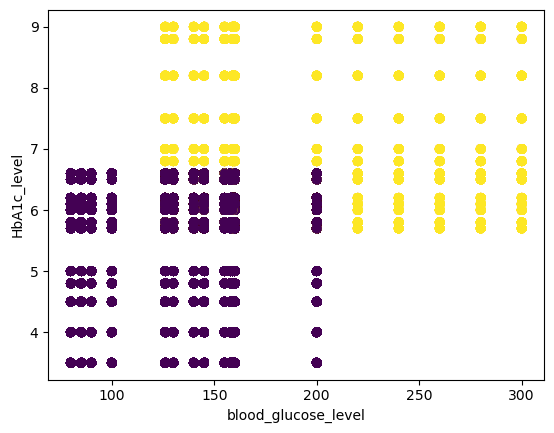

In [43]:
from mpl_toolkits.mplot3d import Axes3D

top_indices = np.argsort(importances)[-2:]

top_feature_names = X.columns[top_indices]

top_features = X.iloc[:, top_indices].values

plt.scatter(top_features[:, 0], top_features[:, 1], c=y, cmap='viridis')

plt.xlabel(top_feature_names[0])
plt.ylabel(top_feature_names[1])

plt.show()